In [4]:
import numpy as np
from scipy.integrate import solve_bvp
import matplotlib.pyplot as plt

https://docs.scipy.org/doc/scipy-0.18.1/reference/generated/scipy.integrate.solve_bvp.html

In [5]:
# all vars are automatically global in python
v=0.25
lbg=0.1
k=0.0003
kbg=0.4
I0=300
mumax=1.2
romax=0.2
m=15
qmax=0.04
qmin=0.004
h=120
d=10

zmax = 30
z = np.linspace(0,zmax,100) # (start,stop, number of nodes)

In [6]:
# functions
def q(Rb, A):
    return Rb/A
    
def p(I,q, mumax=mumax, qmin=qmin, h=h):
    return mumax * (1 - qmin/q) * (I/(h + I))
    
def ro(q, Rd, romax = romax, qmax = qmax, qmin=qmin, m=m):
    return romax * (qmax-q)/(qmax-qmin) * Rd/(m + Rd)

In [7]:
def plankton_equations(z, y):
    A1 = y[0]
    A2 = y[1]
    Rb1 = y[2]
    Rb2 = y[3]
    Rd1 = y[4]
    Rd2 = y[5]
    I = y[6]
    q = Rb1/A1
    
    derivatives = np.vstack((A2,
                     (v*A2 - p(I,q)*A1 + lbg*A1)/d,
                     Rb2,
                     (v*Rb2 - ro(q,Rd1)*A1 - lbg*Rb1)/d,
                     Rd2,
                     (ro(q,Rd1)*A1 - lbg*Rb1)/d,
                     (k*A1 + kbg)*I))
    return derivatives

In [8]:
 def bc(z_0, z_max):
    A1_0=z_0[0]
    A2_0=z_0[1]
    Rb1_0=z_0[2]
    Rb2_0=z_0[3]
    Rd1_0=z_0[4]
    Rd2_0=z_0[5]
    I_0=z_0[6]
    A2_m=z_max[2]
    Rb1_m=z_max[3]
    Rb2_m=z_max[4]
    Rd2_m=z_max[6]
    
    # creates vector res of all things that should equal zero
    res = np.array([I_0 - I0,
                    v*A1_0 - d*A2_0,
                    v*Rb1_0 - d*Rb2_0,
                    Rd2_0,
                    A2_m,
                    Rb2_m,
                    d*Rd2_m - v*Rb1_m])
    return res

In [ ]:
def initial_conditions(initial_guess): # z should NOT be input here - but what is?
    #z_0 = vector
    A1=z_0[0]
    A2=z_0[1]
    Rb1=z_0[2]
    Rb2=z_0[3]
    Rd1=z_0[4]
    Rd2=z_0[5]
    I=z_0[6]
    
    inital_values = np.array([(d/v)*A2,
                              (v/d)*A1,
                              (d/v)*Rb2,
                              (v/d)*Rb1,
                              initial_guess,
                              0,
                              I0])
    return initial_values

In [ ]:
def end_conditions(z_max, initial_guess):
    A1=z_max[0]
    A2=z_max[1]
    Rb1=z_max[2]
    Rb2=z_max[3]
    Rd1=z_max[4]
    Rd2=z_max[5]
    I=z_max[6]
    
    inital_values = np.array([(d/v)*A2,
                              (v/d)*A1,
                              (d/v)*Rb2,
                              (v/d)*Rb1,
                              initial_guess,
                              0,
                              I0])
    return initial_values

In [9]:
# function of initial guesses
def guess_func(z):
    
    zmax = z[len(z)-1]
    mu = z[len(z)-1]/2
    sigma2 = np.power(z[len(z)-1]/10,2)
    
    guess = np.array([np.exp(-np.power((z-mu),2)/sigma2),
                      -2*(z-mu)*np.exp(-(z-mu)*(z-mu)/sigma2),
                      np.exp(-(z-mu)*(z-mu)/sigma2),
                      -2*(z-mu)*np.exp(-(z-mu)*(z-mu)/sigma2),
                      0.5*z,
                      0.5*np.ones(len(z)),
                      I0*np.exp(-kbg*z)])
                      
    return guess

In [10]:
initial_guess_a = np.ones((7,len(z)))
initial_guess_b = guess_func(z)

y_a = initial_guess_a
y_b = initial_guess_b

In [32]:
# solving bvp with two different initial guesses
res_a = solve_bvp(plankton_equations, bc, z, y_a, max_nodes=1000,verbose=1)
res_b = solve_bvp(plankton_equations, bc, z, y_b, max_nodes=1000, verbose=1)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in true_divide
  


Number of nodes is exceeded after iteration 3, maximum relative residual 5.91e+03.
Number of nodes is exceeded after iteration 3, maximum relative residual 9.24e+03.


In [57]:
#help(solve_bvp)

     Reason for algorithm termination:
    
            * 0: The algorithm converged to the desired accuracy.
            * 1: The maximum number of mesh nodes is exceeded.
            * 2: A singular Jacobian encountered when solving the collocation
              system.

In [33]:
print("convergence status a: {} \nconvergence status b: {}".format(res_a.status,res_b.status))
print("solver message a: {} \nsolver message b: {}".format(res_a.message,res_b.message))

convergence status a: 1 
convergence status b: 1
solver message a: The maximum number of mesh nodes is exceeded. 
solver message b: The maximum number of mesh nodes is exceeded.


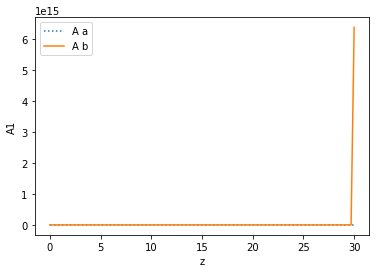

In [34]:
z_plot = np.linspace(0, zmax, 100)
y_plot_a = res_a.sol(z_plot)[0]
y_plot_b = res_b.sol(z_plot)[0]

plt.plot(z_plot, y_plot_a, label='A a', linestyle=':')
plt.plot(z_plot, y_plot_b, label='A b', linestyle='-')
plt.legend()
plt.xlabel("z")
plt.ylabel("A1")
plt.show()

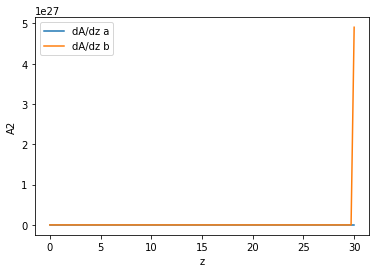

In [35]:
z_plot = np.linspace(0, zmax, 100)
y_plot_a = res_a.sol(z_plot)[1]
y_plot_b = res_b.sol(z_plot)[1]

plt.plot(z_plot, y_plot_a, label='dA/dz a')
plt.plot(z_plot, y_plot_b, label='dA/dz b')
plt.legend()
plt.xlabel("z")
plt.ylabel("A2")
plt.show()

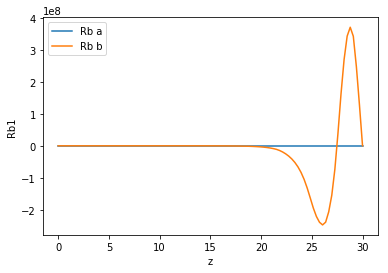

In [36]:
z_plot = np.linspace(0, zmax, 100)
y_plot_a = res_a.sol(z_plot)[2]
y_plot_b = res_b.sol(z_plot)[2]

plt.plot(z_plot, y_plot_a, label='Rb a')
plt.plot(z_plot, y_plot_b, label='Rb b')
plt.legend()
plt.xlabel("z")
plt.ylabel("Rb1")
plt.show()

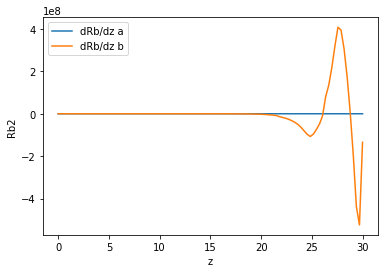

In [37]:
z_plot = np.linspace(0, zmax, 100)
y_plot_a = res_a.sol(z_plot)[3]
y_plot_b = res_b.sol(z_plot)[3]

plt.plot(z_plot, y_plot_a, label='dRb/dz a')
plt.plot(z_plot, y_plot_b, label='dRb/dz b')
plt.legend()
plt.xlabel("z")
plt.ylabel("Rb2")
plt.show()

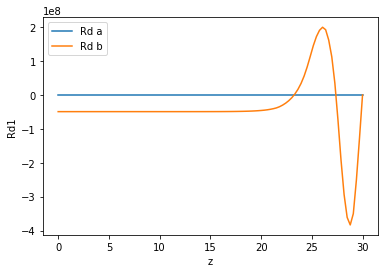

In [38]:
z_plot = np.linspace(0, zmax, 100)
y_plot_a = res_a.sol(z_plot)[4]
y_plot_b = res_b.sol(z_plot)[4]

plt.plot(z_plot, y_plot_a, label='Rd a')
plt.plot(z_plot, y_plot_b, label='Rd b')
plt.legend()
plt.xlabel("z")
plt.ylabel("Rd1")
plt.show()

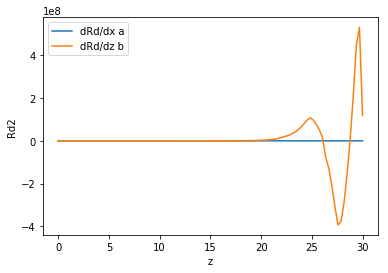

In [39]:
z_plot = np.linspace(0, zmax, 100)
y_plot_a = res_a.sol(z_plot)[5]
y_plot_b = res_b.sol(z_plot)[5]

plt.plot(z_plot, y_plot_a, label='dRd/dx a')
plt.plot(z_plot, y_plot_b, label='dRd/dz b')
plt.legend()
plt.xlabel("z")
plt.ylabel("Rd2")
plt.show()

In [13]:
z_plot = np.linspace(0, zmax, 100)
y_plot_a = res_a.sol(z_plot)[6]
y_plot_b = res_b.sol(z_plot)[6]

plt.plot(z_plot, y_plot_a, label='I a')
plt.plot(z_plot, y_plot_b, label='I b')
plt.legend()
plt.xlabel("z")
plt.ylabel("I")
plt.show()

NameError: name 'res_a' is not defined